In [1]:
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

import scipy.fftpack

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

[[  5.20000000e-03   0.00000000e+00]
 [  4.35350000e-02   0.00000000e+00]
 [  8.18680000e-02   0.00000000e+00]
 ..., 
 [  6.49472020e+01   0.00000000e+00]
 [  6.49718720e+01   0.00000000e+00]
 [  6.49963680e+01   0.00000000e+00]]


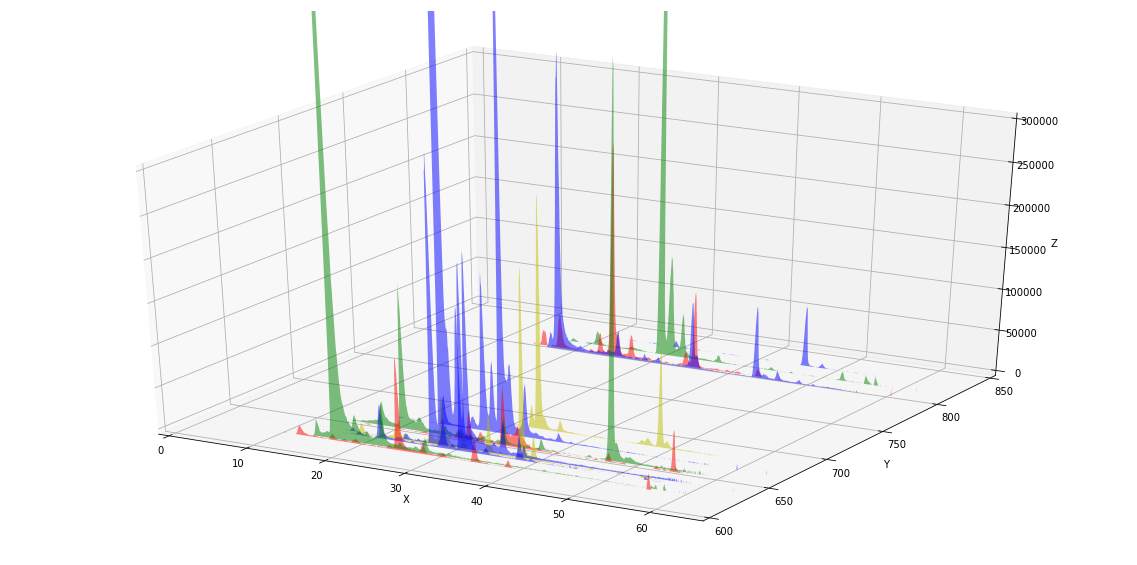

In [6]:
data = pd.io.parsers.read_csv("Kuerbis_Analyse_3h_LC-ESI-MS.csv")

helpvalue = ['617', '619', '629', '631', '633', '645', '647', '661', '675', '793', '795', '807', '821']

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

i = 0
verts = []
xs = data[['Zeit']].values
xs = np.hstack(xs)
zs = [617, 619, 629, 631, 633, 645, 647, 661, 675, 793, 795, 807, 821]

for h in helpvalue:
    ys = data[[helpvalue[i]]].values
    ys = np.hstack(ys)
    verts.append(list(zip(xs, ys)))
    i = i+1

print(np.array(verts)[2])
poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'), cc('y'), cc('b'),cc('r'), cc('g'), cc('b'), cc('y'), cc('b'), cc('r'), cc('g'), cc('b')])
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 65)
ax.set_ylabel('Y')
ax.set_ylim3d(600, 850)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 300000)

plt.show()

In [5]:
ys = 0
i = 0
highest_peak = []

fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.001)

for h in helpvalue:
    ys = data[[helpvalue[i]]].values
    ys = np.hstack(ys)
    
    highest_peak.append(ys.max())
    
    i = i+1

highest_peak = np.array(highest_peak).max()

ys = 0
i=0

for h in helpvalue:
    ys = data[[helpvalue[i]]].values
    ys = np.hstack(ys)
    
    y = []
    for x in ys:
        y.append(((x/highest_peak)*100)+previous_mass+10)
    
    previous_mass = np.array(y).max()
    
    line = plt.plot(xs, y, label = h + '[M+H]^+^')
    ax.annotate('local max', xy=(2, y[1]), xytext=(3, 1.5))
    i = i+1


ax.set_yticklabels([])
plt.xlabel('Normalised Collision Energy (%)')
plt.ylabel('% of highest peak')
plt.xlim(0,65)
plt.show()

NameError: name 'previous_mass' is not defined

In [ ]:

fig = plt.figure(facecolor='k')
ax = fig.add_subplot(111, axisbg='k')

def fG(x, x0, sigma, A):
    """ A simple (un-normalized) Gaussian shape with amplitude A. """
    return A * np.exp(-((x-x0)/sigma)**2)

# Draw ny lines with ng Gaussians each, on an x-axis with nx points
nx, ny, ng = 1000, 20, 4
x = np.linspace(0,1,1000)

y = np.zeros((ny, nx))
for iy in range(ny):
    for ig in range(ng):
        # Select the amplitude and position of the Gaussians randomly
        x0 = np.random.random()
        A = np.random.random()*10
        sigma = 0.05
        y[iy,:] += fG(x, x0, sigma, A)
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
    ax.plot(x,y[iy]+offset, 'w', lw=2, zorder=(iy+1)*2)
    ax.fill_between(x, y[iy]+offset, offset, facecolor='k', lw=0, zorder=(iy+1)*2-1)
plt.show()

In [ ]:


%matplotlib inline



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
T = 60.
n = 512
t = np.linspace(-T/2., T/2., n+1)
t = t[0:n]
# There's a function to set up the frequencies, but doing it by hand seems to help me think 
# things through.
k = np.array([(2. * np.pi)*i if i < n/2 else (2. * np.pi) * (i - n) 
  for i in range(n)])

ks = np.fft.fftshift(k)
slc = np.arange(0, 10, 0.5)
# I haven't quite figured out how to use the meshgrid function in numpy
T, S = np.meshgrid(t, slc)
K, S = np.meshgrid(k, slc)

# Now, we have a plane flying back and forth in a sine wave and getting painted by a radar pulse
# which is a hyperbolic secant (1/cosh)
U = 1./np.cosh(T - 10. * np.sin(S)) * np.exp(1j * 0. * T)

def waterfall(X, Y, Z, nslices):

  # Function to generate formats for facecolors
  cc = lambda arg: colorConverter.to_rgba(arg, alpha=0.3)
  # This is just wrong. There must be some way to use the meshgrid or why bother.
  verts = []
  for i in range(nslices):
    verts.append(list(zip(xs[i], y[i])))

  xmin = np.floor(np.min(xs))
  xmax = np.ceil(np.max(xs))
  ymin = np.floor(np.min(zs))
  ymax = np.ceil(np.max(zs))
  zmin = np.floor(np.min(ys.real))
  zmax = np.ceil(np.max(np.abs(ys)))

  fig=plt.figure()
  ax = Axes3D(fig)
 
  poly = PolyCollection(verts, facecolors=[cc('g')])
  ax.add_collection3d(poly, zs=zs, zdir='y')
  ax.set_xlim(xmin,xmax)
  ax.set_ylim(ymin,ymax)
  ax.set_zlim(zmin,zmax)
  plt.show()

waterfall(T, S, U.real, len(slc))